# India e-commerce data analysis

<b>인도 e-commerce 웹사이트가 출처인 데이터</b>

- <b>데이터 종류</b>
    * order_list
        - 변수 : 주문ID, 주문날짜, 주문고객 이름, 주문고객이 거주하는 State와 city
    * order_detail
        - 변수 : 주문ID, 주문결제금액, 주문당 순이익, 구매양, 구매물품 카테고리/서브 카테고리
    * sales_target 
        - 변수 : 주문 날짜, 구매물품 카테고리, 해당 카테고리의 목표매출
        
        
- <b>문제 정의</b>
    * "품목 카테고리별 목표매출 달성했다면 어떤 날짜, 시간, 지역에서 주문이 많이 발생하는가?"
    * "품목 카테고리별 목표매출 달성하지 못했다면 어떤 날짜, 시간, 지역을 위해서 마케팅을 펼쳐야 할까?"



- <b>데이터 미리보기만 보고 내린 분석 설계</b>
    * order_list와 order_detail의 공통 key인 'Order ID'를 기준으로 분석하자
    * order_lsit와 sales_target의 공통 key인 '주문 날짜'를 기준으로 분석하자
    * 그리고 3가지 데이터를 총체적으로 결합해서 인사이트 도출해보기

In [76]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [77]:
# 데이터 로드
order_list = pd.read_csv('List of Orders.csv', encoding='utf-8')
order_detail = pd.read_csv('Order Details.csv', encoding='utf-8')
sales_target = pd.read_csv('Sales target.csv', encoding='utf-8')

print("order_list shape :", order_list.shape)
print("order_detail shape :", order_detail.shape)
print(f"sales_target shape :", sales_target.shape)

order_list shape : (560, 5)
order_detail shape : (1500, 6)
sales_target shape : (36, 3)


In [78]:
# 가설설정하기 전에 데이터 미리보기1
order_list.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [79]:
# 가설설정하기 전에 데이터 미리보기2
order_detail.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [80]:
# 가설설정하기 전에 데이터 미리보기3
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


## Data cleansing

### order_list 데이터 cleansing

In [81]:
# 중복 데이터 있는지 살펴보기 -> 59개 존재한다.
order_list.duplicated().sum()

59

In [82]:
# 중복 데이터가 무엇인지 살펴보자 -> 결측치 인듯 싶다.
order_list[order_list.duplicated()]

,Order ID,Order Date,CustomerName,State,City
501,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN


In [83]:
# 결측치 개수가 중복데이터 개수와 동일한지 살펴보기 -> NaN(결측치) 데이터도 1개는 unique한 것으로 치기 때문에 중복데이터 59개 더하면 
# 결측치 개수 60개와 동일함.
# 따라서 중복 데이터 = 결측치 데이터
order_list.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [84]:
# 모든 변수에 결측치가 있기 때문에 결측치를 대체할만한 근거가 없음. 따라서 결측치 삭제해주기
order_list.dropna(inplace=True)
order_list.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [85]:
# 칼럼별 data type 살펴보기
order_list.dtypes

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object

In [86]:
# Order Date칼럼 값들을 Datetime형태로 바꿔주기
order_list['Order Date'] = pd.to_datetime(order_list['Order Date'])
order_list.dtypes

Order ID                object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
dtype: object

In [87]:
order_list.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata


### order_detail 데이터 cleansing

In [88]:
# 중복 데이터 여부 확인 -> 중복 데이터 없음
order_detail.duplicated().sum()

0

In [89]:
# 결측치 데이터 확인  -> 결측치 데이터 없음
order_detail.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [90]:
# data의 type들은 제대로 설정되어 있음.
order_detail.dtypes

Order ID         object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object

### sales_target 데이터 cleansing

In [91]:
# 중복 데이터 확인 -> 없음
sales_target.duplicated().sum()

0

In [92]:
# 결측치 데이터 확인 -> 없음
sales_target.isnull().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [93]:
# 데이터 타입 확인 
sales_target.dtypes

Month of Order Date     object
Category                object
Target                 float64
dtype: object

* Month of Order Date 값들 Datetime형태에 맞게 바꿔주자

In [94]:
# 'month-date' 인지 'month-year'인지 확인해보기 -> 'month-year'임을 확인!
sales_target['Month of Order Date'].unique()

array(['Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19'],
      dtype=object)

In [95]:
# Datetime 형태로 바꿔주기 위해 Month 문자열을 숫자로 바꿔주기
months_dict = {'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10',
              'Nov':'11', 'Dec':'12', 'Jan':'1', 'Feb':'2', 'Mar':'3'}
def convert_to_dt(df):
    for month in months_dict.keys():
        if df['Month of Order Date'].split('-')[0] in months_dict.keys():
            df['Month of Order Date'] = df['Month of Order Date'].replace(month, months_dict[month])
    return df

In [96]:
month_year_df = sales_target.apply(convert_to_dt, axis=1).copy()
month_year_df.head()

,Month of Order Date,Category,Target
0,4-18,Furniture,10400.0
1,5-18,Furniture,10500.0
2,6-18,Furniture,10600.0
3,7-18,Furniture,10800.0
4,8-18,Furniture,10900.0


In [97]:
# Datetime형태로 바꿔줌으로써 월별 데이터로 전환
# 일(day)는 1일 이지만 월별 데이터임!!
month_year_df['Month of Order Date'] = pd.to_datetime(month_year_df['Month of Order Date'], format='%m-%y')
month_year_df = month_year_df.sort_values(by=['Month of Order Date'])
month_year_df.head(10)

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
24,2018-04-01,Electronics,9000.0
12,2018-04-01,Clothing,12000.0
1,2018-05-01,Furniture,10500.0
25,2018-05-01,Electronics,9000.0
13,2018-05-01,Clothing,12000.0
2,2018-06-01,Furniture,10600.0
26,2018-06-01,Electronics,9000.0
14,2018-06-01,Clothing,12000.0
3,2018-07-01,Furniture,10800.0


In [98]:
# 칼럼명을 '월별 데이터' 추가해서 인지하도록 하기
month_year_df.rename(columns={'Month of Order Date':'Monthly Order Date'}, inplace=True)
month_year_df.head(2)

,Monthly Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
24,2018-04-01,Electronics,9000.0


In [99]:
# reset indexing 해주기
month_year_df.reset_index(drop=True, inplace=True)
month_year_df.head()

,Monthly Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-04-01,Electronics,9000.0
2,2018-04-01,Clothing,12000.0
3,2018-05-01,Furniture,10500.0
4,2018-05-01,Electronics,9000.0


## Exploring data

### order_list data

In [100]:
# object타입의 칼럼들 통계량 요약
order_list.describe(include='object')

,Order ID,CustomerName,State,City
count,500,500,500,500
unique,500,332,19,24
top,B-26061,Shreya,Madhya Pradesh,Indore
freq,1,6,101,76


- Order ID는 중복없이 모두 1개씩 unique한 값들이다


- CustomerName에서는 가장 많이 구매한 고객이름은 'Shreya'이다. 그런데 빈도수는 6번으로 전체 500번중에 6번이며 다른 고객들과 빈도수의 차이가 얼마 나지 않을 것으로 판단되어 누가 충성고객인지는 알 수 없을 것 같다. -> 그렇다면 충성고객을 만들기 위해서 마케팅 전략을 펼쳐야 하지 않을까..!?


- 가장 많이 구매가 이루어진 State는 Madhya Pradesh라는 곳으로 전체 구매의 1/5을 차지한다.

    * 마디아프라데시 주(영어: Madhya Pradesh, 힌디어: मध्य प्रदेश)는 ``인도 중앙부에 있는 주로서, 인도의 주 중 가장 넓다.`` 주도는 보팔이다. ``전형적인 농업주로 주민의 82%가 농업에 종사한다.`` 쌀·밀·잡곡을 생산하는데 쌀은 남부에서, 밀과 잡곡은 북에서 많이 나며 남서부의 마르와 대지에서는 면화가 재배된다. 동부에는 석탄, 철광석 등의 자원이 있어, 그 개발이 현재 진행 중이다. 이들 자원을 배경으로 동부의 공업화가 진행되었다. <a href='https://ko.wikipedia.org/wiki/%EB%A7%88%EB%94%94%EC%95%84%ED%94%84%EB%9D%BC%EB%8D%B0%EC%8B%9C%EC%A3%BC'>출처 :위키피디아 링크</a>


- 가장 많이 구매가 이루어진 City는 Indore이며 500번의 구매중 76번의 구매가 이루어진 곳이다.
    
    * 인도르(Indore)는 인도 마디아프라데시 주 서부에 있는 도시이다. 곡물과 연초의 집산지로서 인구는 258만 5,321명(2001)이다. 구 인도르 왕국의 수도로 번영을 누렸다. <a href='https://ko.wikipedia.org/wiki/%EC%9D%B8%EB%8F%84%EB%A5%B4'>출처 : 위키피디아 링크</a>

In [101]:
# State별로 주문이 얼마나 이루어졌는지 시각화 해보기
state_count = order_list.groupby('State').agg({'Order ID':'count'}).rename(columns={'Order ID':'Counts'})
state_count = state_count.sort_values(by=['Counts'], ascending=False)
state_count.head()

,Counts
State,
Madhya Pradesh,101
Maharashtra,90
Rajasthan,32
Gujarat,27
Punjab,25


In [102]:
# 시각화 해보기
import chart_studio.plotly as pyo
import cufflinks as cf
cf.go_offline(connected=True)

state_count.iplot(kind='bar')

- 두 번째로 가장 많이 구매한 도시는 Maharashtra이다. <a href='https://ko.wikipedia.org/wiki/%EB%A7%88%ED%95%98%EB%9D%BC%EC%8A%88%ED%8A%B8%EB%9D%BC%EC%A3%BC'> 마하라슈트라주에 대한 자세한 설명</a>



- 상위 2개의 도시 구매만 합쳐도 191개로 전체 구매 횟수의 40%를 차지한다.



- <b>Q.의문점) 인도의 수도인 델리가 왜이렇게 구매가 낮을까? 델리에서 해당 웹사이트에 대한 홍보가 덜 된게 아닐까?</b>

In [103]:
# 구매수가 많은 도시는 구매가 많은 State와 연결이 될까?
state_city = order_list.groupby(['State','City']).agg({'Order ID':'count'}).rename(columns={'Order ID':'Counts'})
state_city = state_city.sort_values(by=['Counts'], ascending=False)
state_city.head(10)

,,Counts
State,City,
Madhya Pradesh,Indore,76
Maharashtra,Mumbai,68
Madhya Pradesh,Bhopal,22
Maharashtra,Pune,22
West Bengal,Kolkata,22
Delhi,Delhi,22
Karnataka,Bangalore,21
Rajasthan,Jaipur,19
Gujarat,Ahmedabad,17


- 가장 구매수가 많았던 도시인 Indore는 가장 구매수가 많았던 State인 Medhya Pradesh에 속하는 도시였다.
- 두 번째로 가장 많았던 도시도 Mumbai로 두번째로 가장 구매수가 많았던 Maharashtra에 속하는 도시였다.
- 도시별 구매 3,4위도 State별 구매 상위 1,2위에 속하는 도시들이였다.

### order_detail data

In [104]:
# 순이익을 나타내는 Profit이 음수로 되어있다. 이를 양수로 바꿔주자.
# pandas의 abs()사용
order_detail['Profit'] = order_detail['Profit'].abs()
order_detail.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,1148.0,7,Furniture,Bookcases
1,B-25601,66.0,12.0,5,Clothing,Stole
2,B-25601,8.0,2.0,3,Clothing,Hankerchief


In [105]:
# 칼럼별 데이터 타입 보기
order_detail.dtypes

Order ID         object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object

In [106]:
# Order ID별로 그룹핑해서 어떤 주문ID(고객)가 가장 많이 주문했는지 살펴보기
id_counts = order_detail.groupby('Order ID').agg({'Quantity':'sum'}).rename(columns={'Quantity':'Counts'})
id_counts = id_counts.sort_values(by=['Counts'], ascending=False)
id_counts.head(10)

,Counts
Order ID,
B-26055,57
B-26051,49
B-25753,47
B-25757,47
B-25955,46
B-25653,45
B-25950,45
B-25656,43
B-25973,40


In [107]:
# boxplot으로 주문ID별 구매횟수 분포 살펴보기
id_counts.iplot(kind='box', theme='white')

In [108]:
# Category별로 어떤상품이 많이 팔렸는지 살펴보기
cate_cnt = order_detail.groupby('Category').agg({'Quantity':'sum'}).rename(columns={'Quantity':'Counts'})
cate_cnt = cate_cnt.sort_values(by=['Counts'], ascending=False)
print(f" cate_cnt shape : {cate_cnt.shape}")
cate_cnt.head()

 cate_cnt shape : (3, 1)


,Counts
Category,
Clothing,3516
Electronics,1154
Furniture,945


In [109]:
# 비율로 나타내어보기
cate_cnt['Ratio'] = cate_cnt['Counts'] / cate_cnt['Counts'].sum()
cate_cnt

,Counts,Ratio
Category,,
Clothing,3516,0.626180
Electronics,1154,0.205521
Furniture,945,0.168299


- Category에서는 **Clothing 즉, 의류제품**이 압도적으로 전체 주문의 60%를 차지함.
- 전자제품인 Electronics와 가구제품인 Furniture간에 차이는 얼마나지 않는다.

In [110]:
# Sub-category에서는 어떤 제품이 가장 많이 팔렸는지 살펴보기
sub_cnt = order_detail.groupby('Sub-Category').agg({'Quantity':'sum'}).rename(columns={'Quantity':'Counts'})
sub_cnt = sub_cnt.sort_values(by=['Counts'], ascending=False)
print("sub_cnt shape :", sub_cnt.shape)
sub_cnt.head()

sub_cnt shape : (17, 1)


,Counts
Sub-Category,
Saree,782
Hankerchief,754
Stole,671
Furnishings,310
T-shirt,305


In [111]:
# Sub-Category별 구매횟수 시각화해보기
sub_cnt.iplot(kind='bar', theme='white')

- 가장 많이 팔린 제품은 Saree로 Saree는 인도 여성들의 전통 의상이다. 자세한 이미지는 <a href='https://www.google.com/search?q=saree&sxsrf=ALeKk01gmZoGmwLJbiBAJPBX-peEfrZ0yQ:1596357588882&source=lnms&tbm=isch&sa=X&ved=2ahUKEwitzZO4j_zqAhWsy4sBHQQnDkQQ_AUoAXoECAwQAw&cshid=1596357600531257&biw=1440&bih=798'>여기 </a>참조

- 두번째로 많이 팔린 제품은 Hankerchief로 손수건이다.
- 세번째로 많이 팔린 제품은 Stole로 목이나 얼굴에 걸치는 악세사리를 의미한다. 자세한 이미지는 <a href='https://www.google.com/search?q=india+stole&hl=ko&sxsrf=ALeKk02C6WRfR1ja4jO1ymIWQLxVu4uYvQ:1596357786081&source=lnms&tbm=isch&sa=X&ved=2ahUKEwip-peWkPzqAhWNIqYKHfn6D88Q_AUoAXoECAsQAw&biw=1440&bih=798'>여기 </a>참조

In [112]:
# Sub-Category 품목 상위 3개가 어떤 Category에 속하는지 살펴보기
sub_top3 = order_detail[order_detail['Sub-Category'].str.contains('Saree|Hankerchief|Stole')]['Category']
sub_top3.value_counts()

Clothing    600
Name: Category, dtype: int64

- Sub-category 상위 3개품목은 모두 Category에서 가장 많은 구매횟수를 기록한 Clothing카테고리에 속했다.
- 인도의 문화특성상 Saree나 Stole과 같은 전통의상을 국민들이 무조건적으로 입고다녀야 하기 때문에 당연하게 구매율이 가장 높았다.
- 의외였던 점은 손수건(Hankerchief)도 인도인들이 많이 구매하는(가지고 다니는) 제품이라는 새로운 사실을 알게 되었다.

### sales_target data

- sales_target데이터의 날짜 변수를 Datetime형태인 월별 데이터로 바꿔주기 위해서 전처리한 변수명 month_year_df을 사용

In [113]:
# 목표매출을 설정한 품목 Category가 무엇인지 살펴보기 => 모든 Category를 월별로 목표매출을 설정해놓음.
month_year_df['Category'].unique()

array(['Furniture', 'Electronics', 'Clothing'], dtype=object)

In [114]:
# Category별로 목표매출을 어떻게 설정했었는지 살펴보기
# Category별로 데이터프레임 분할해서 dictionary에다가 key-value 형태로 담기
category_lst = month_year_df['Category'].unique().tolist()
sub_df = {}
for category in category_lst:
    sub_df[category] = month_year_df[month_year_df['Category'] == category]

In [115]:
# Category별로 시간이 지남에 따라 e-commerce회사에서 매출목표를 어떻게 설정했는지 살펴보기
for category in sub_df.keys():
    df = sub_df[category]
    df = df[['Monthly Order Date', 'Target']].set_index('Monthly Order Date')
    layout = {
        'title':{
            'text': f"<b>Target sales of {category}</b>",
            'font':{
                'size':40,
                'color':'blue'
            },
            'x':0.5,
            'y':0.9
        },
        'xaxis':{
            'showticklabels':True,
            'dtick':'M1'
        }
    }
    df.iplot(kind='scatter', mode='lines+markers', layout=layout)

- Furniture은 시간이 지남에 따라 목표매출을 서서히 올렸다.
- 하지만 Electronice인 전자제품은 
    * **18년 12월에서 19년 1월**로 변화하는 시점에 목표매출을 매우 극단적으로 급격히 올렸다. 왜일까?
    
    
- 또한 Clothing인 의류제품은 
    * **18년 6월에서 7월에 급격히, 19년 9월에서 10월**에 급격히 목표매출을 올렸다. 왜일까?

## order_list와 order_detail 데이터 결합

In [116]:
# order_detail과 order_list 모두 중요한 정보를 담고 있기 때문에 merge하면서 outer join시키기
merge_df = pd.merge(order_list, order_detail, how='outer')
merge_df.shape

(1500, 10)

In [117]:
merge_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,1148.0,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,12.0,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,2.0,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,56.0,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,111.0,2,Electronics,Phones


In [118]:
# Order Date(주문날짜)를 기준으로 년도-월별 데이터로 집계하기
# 년도-월별 값만을 담은 추가적인 칼럼 추가해주기
merge_df['year_month'] = merge_df['Order Date'].dt.to_period('M')
year_month = merge_df.groupby(['year_month','Category']).agg({'Amount':'sum', 'Profit':'sum'}).rename(columns={'Amount':'Amount_sum',
                                                                                    'Profit':'Profit_sum'})
year_month = year_month.reset_index()
year_month_real = year_month.rename(columns={'year_month':'Monthly Order Date'})
year_month_real.head(3)

,Monthly Order Date,Category,Amount_sum,Profit_sum
0,2018-01,Clothing,5355.0,1306.0
1,2018-01,Electronics,7624.0,2436.0
2,2018-01,Furniture,5056.0,3350.0


In [119]:
# 년도-월로 변경
month_year_df['Monthly Order Date'] = month_year_df['Monthly Order Date'].dt.to_period('M')
month_year_target = month_year_df.copy()
month_year_target.head(3)

,Monthly Order Date,Category,Target
0,2018-04,Furniture,10400.0
1,2018-04,Electronics,9000.0
2,2018-04,Clothing,12000.0


In [121]:
# 년도-월 값을 key로 join시키기 전에 각 데이터의 shape살펴보기
print(f"실제 매출 기록되있는 데이터 : {year_month_real.shape}")
print(f"목표 매출 기록되있는 데이터 : {month_year_target.shape}")

실제 매출 기록되있는 데이터 : (71, 4)
목표 매출 기록되있는 데이터 : (36, 3)


In [134]:
# 실제매출 데이터와 목표매출 데이터를 Category와 날짜(년도-월) 기준으로 병합하기
real_vs_target = pd.merge(month_year_target, year_month_real, on=['Monthly Order Date','Category'])
real_vs_target.head()

,Monthly Order Date,Category,Target,Amount_sum,Profit_sum
0,2018-04,Furniture,10400.0,6570.0,1048.0
1,2018-04,Electronics,9000.0,8857.0,2078.0
2,2018-04,Clothing,12000.0,10743.0,3003.0
3,2018-05,Furniture,10500.0,4677.0,1071.0
4,2018-05,Electronics,9000.0,8759.0,3292.0


In [135]:
# 목표매출과 실제매출을 비교해보았을 때 적자여부 칼럼 만들기
def whether_deficit(df):
    if df['Amount_sum'] - df['Target'] > 0:
        df['deficit'] = 'no'
    else:
        df['deficit'] = 'yes'
    df['deficit_amount'] = df['Amount_sum'] - df['Target']
    return df
real_vs_target = real_vs_target.apply(whether_deficit, axis=1)

In [136]:
# 적자금액이 매우 큰 순으로 정렬해보기
deficit_order = real_vs_target.sort_values(by=['deficit_amount'])
deficit_order.head()

,Monthly Order Date,Category,Target,Amount_sum,Profit_sum,deficit,deficit_amount
32,2019-02,Clothing,16000.0,4507.0,1154.0,yes,-11493.0
25,2018-12,Clothing,16000.0,5769.0,715.0,yes,-10231.0
11,2018-07,Clothing,14000.0,4020.0,1124.0,yes,-9980.0
30,2019-02,Electronics,16000.0,6693.0,2673.0,yes,-9307.0
6,2018-06,Furniture,10600.0,3622.0,1128.0,yes,-6978.0


In [153]:
date_deficit = real_vs_target[['Monthly Order Date','Category','deficit_amount']]

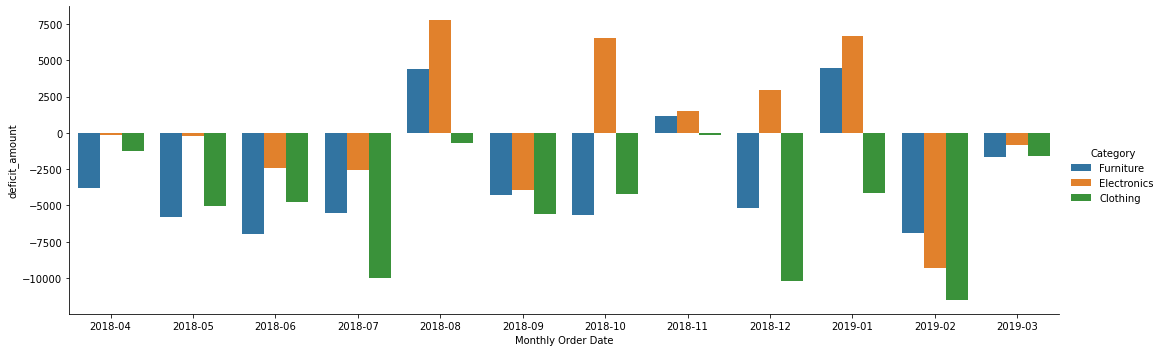

In [160]:
# Category별로 년도-월에 따른 적자, 흑자 얼마나 큰지 시각화해보기
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=date_deficit, x='Monthly Order Date', y='deficit_amount',
           hue='Category', kind='bar', height=5, aspect=3)

- 가장 구매수가 많은 제품이 Clothing(의류)임에도 불구하고 기간동안 가장 많은 적자를 기록한 것은 Clothing이다. 
    * 그렇다면 구매수가 많음에도 목표매출과 비교해보았을 때는 Clothing의 구매횟수는 적은 편이라는 인사이트가 도출
    * Clothing을 구매하는 사람들에 대한 행동 log 데이터 살펴보고 어디서 이탈하는지 살펴볼 필요가 있음


- 오히려 가장 많은 흑자를 기록한 제품은 Electronics(전자제품)이다. 이는 제품이 예상보다 잘 팔림을 알 수 있다.
    * Electronics를 구매하는 사람들의 행동 log과 정보를 파악하고 추가적인 마케팅 실시하여 잠재적인 고객들을 유입시킬 수 있는 가능성 존재
    
    
- Furniture도 큰 흑자를 2번 정도 기록한 히스토리가 있다.
    * Furniture를 구입하는 사람들의 행동 log도 살펴보고 잠재적인 고객들을 유입시킬 수 있는 가능성이 또한 존재.

In [161]:
# 행동 log 데이터는 없으니 분석 못함. 대신 전자제품과 가구 구매하는 고객들의 정보를 파악해보고 리포팅 작성하기